In [2]:
print('hellou')

hellou


#PREDICTING HEART DISEASE USING MACHINE LEARNING
This notebook looks into using various python-based ml and data science libs in an attempt to build a ml model capable of predicting wheather  or not someone has heart disease based on their medical attributes


we're going to take the following approach
1.problem defination
2.data
3.evaluation
4.features
5.modelling
6.experimantation


Problem defination::
        Given clinical parameters about a patient ,can we predict wheather or not they have heart disease?
Data:
    From kaggle:
Evaluation:
                If we can reach 95% acc..y at predicting wheather or not a patient has a heart disease during the proof of concept,we'll  purse the project.
Features:
    HERE we know about the each column in data dictionary...(data Analysis).

In [41]:
#import all the tools wwe need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#we want our plots to appear insie the notebook

#models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#MOdel evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


In [3]:
# WE must download Data Dictionary


In [4]:
data_df=pd.read_csv("heart.csv")

In [5]:
data_df.shape

(303, 14)

In [6]:
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
#lest find out how many of each class there
data_df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

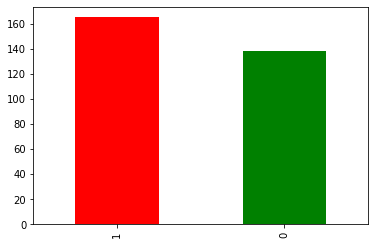

In [9]:
data_df["target"].value_counts().plot(kind="bar",color=["red","green"]);


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
#weathher there any null values 
data_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
data_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# HEART DISEASE FREQUENCY ACCORDING TO SEX
data_df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
#compare target column with sex column
pd.crosstab(data_df.target,data_df.sex)

sex,0,1
target,,
0,24,114
1,72,93


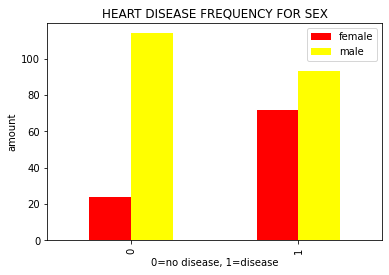

In [15]:
#create plot crosstab
pd.crosstab(data_df.target,data_df.sex).plot(kind="bar",color=["red","yellow"]);
plt.title("HEART DISEASE FREQUENCY FOR SEX")
plt.xlabel("0=no disease, 1=disease")
plt.ylabel("amount")
plt.legend(["female","male"])

In [16]:
# compare restecg with target
data_df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [17]:
data_df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

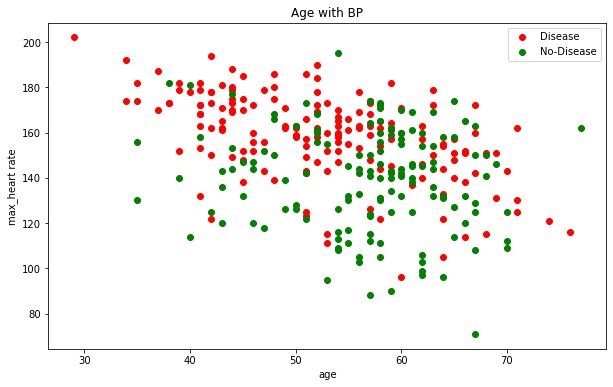

In [18]:
# avg vs max heart rate for heart disease
#crate another figure
plt.figure(figsize=(10,6))
#scatter with positive examples
plt.scatter(data_df.age[data_df.target==1],data_df.thalach[data_df.target==1],color="red")
#scatter with nagative exampls
plt.scatter(data_df.age[data_df.target==0],data_df.thalach[data_df.target==0],color="green")
plt.title("Age with BP")
plt.xlabel("age")
plt.ylabel("max_heart rate")
plt.legend(["Disease","No-Disease"]);

<AxesSubplot:>

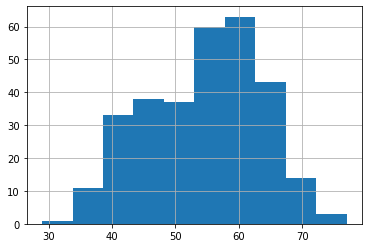

In [19]:
data_df.age.hist()

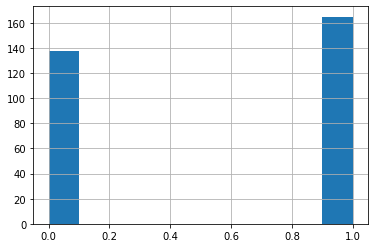

In [20]:
data_df.target.hist();

In [21]:
#Heart Disease frequency per chest pain Type
0.Typical angina:chest pain related decrease blood supply to the heat
1.Atypical angina:chest pain not related to heart
2.Non-angina pain:Typically esophageal spasms(non heart related)
3.Asymptometic:chest pain not showing sign of disease

SyntaxError: invalid syntax (<ipython-input-21-76736aa0954b>, line 2)

In [22]:
pd.crosstab(data_df.cp,data_df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


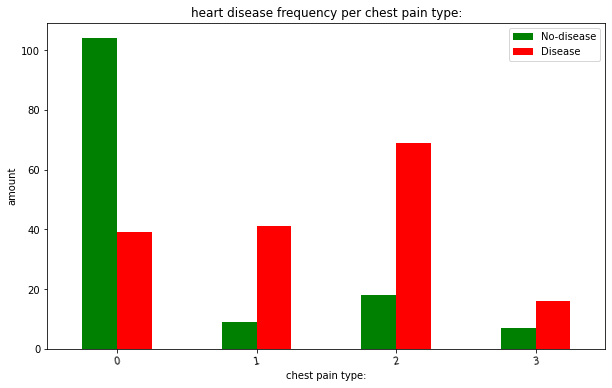

In [58]:
# make the crossta more visual
pd.crosstab(data_df.cp,data_df.target).plot(kind="bar",figsize=(10,6),
                                           color=["green","red"])
plt.title("heart disease frequency per chest pain type:")
plt.xlabel("chest pain type:")
plt.ylabel("amount")
plt.legend(["No-disease","Disease"])
plt.xticks(rotation=10);

In [23]:
# make a correlation matrix
data_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Done with data analysis

### modelling

In [ ]:
#split the data into x and y

In [24]:
x=data_df.drop("target",axis=1)
y=data_df["target"]
model=RandomForestClassifier()

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
Final_pred=model.score(x_test,y_test)*100
Final_pred

81.9672131147541

In [28]:
#prediction
y_preds=model.predict(x_test)

In [29]:
y_preds

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [30]:
conf_matrix=(y_test,y_preds)

In [31]:
pd.crosstab(y_test,y_preds)

col_0,0,1
target,,
0,24,6
1,5,26


In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cv_acc=cross_val_score(model,x,y,cv=5)

In [34]:
cv_acc

array([0.85245902, 0.90163934, 0.80327869, 0.81666667, 0.76666667])

In [35]:
np.mean(cv_acc)*100

82.81420765027322

In [36]:
print(f"Precision:{precision_score(y_test,y_preds)}")

Precision:0.8125


In [42]:
#put model in a dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "RandomForestClassifier":RandomForestClassifier()}
#create a function to fit and score models
def fit_score(models,x_train,x_test,y_train,y_test):
    """ 
        Fits and evaluates given machine learning models.
        MODELS:A DICTIONARY OF DIFFERENT SCIKIT-LEARN MACHINE LEARNING MODELS
        X_TRAIN:TRAING DATA
        Y-TRAIN:traing data
        """
    #set random seed  
    np.random.seed(43)
    # make dictionary to keep model score
    model_score={}

    #Loop through the model
    for name, model in models.items():
        #fit the model to the dtA
        model.fit(x_train, y_train)
        #evaluate the mdel and append its score to model score
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [50]:
model_compare=pd.DataFrame(model_score, index=["Accuracy"])
model_compare.T.plot.bar();

NameError: name 'model_score' is not defined

In [37]:
model_score=fit_score(models=models,
                     x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test
                     )
model_score

C:\Users\chokkam.nagaraju\Desktop\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7540983606557377,
 'KNN': 0.5737704918032787,
 'RandomForestClassifier': 0.7868852459016393}

# LogisticRegression

In [38]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

C:\Users\chokkam.nagaraju\Desktop\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7540983606557377

# KNeighborsClassifier

In [39]:
obl=KNeighborsClassifier()
obl.fit(x_train,y_train)
obl.score(x_test,y_test)

0.5737704918032787

## we haveBaseline Model...

In [40]:
#Let's look at the following
* Hyperparameters tuning
* Features importance
* confusion matrix 
*cross_validation
*precision
* recall
*f1 score
*classification report
*ROC curve
AUC curve


SyntaxError: invalid syntax (<ipython-input-40-8e0bfb683fed>, line 2)

# Hyperparameter tuning

In [62]:
# lets tune KNN
train_scores=[]
test_scores=[]
#create a list of different values for n_neighbors
neighbors=range(1,30)
# set up KNN instance
knn=KNeighborsClassifier()
#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(x_train,y_train)
    #update the trianing scores list
    train_scores.append(knn.score(x_train,y_train))
    # update the test scores list
    test_scores.append(knn.score(x_test,y_test))
    

In [64]:
train_scores

[1.0,
 0.8016528925619835,
 0.7851239669421488,
 0.7520661157024794,
 0.7768595041322314,
 0.768595041322314,
 0.7272727272727273,
 0.7231404958677686,
 0.7148760330578512,
 0.71900826446281,
 0.7148760330578512,
 0.7066115702479339,
 0.7148760330578512,
 0.7066115702479339,
 0.7231404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.7148760330578512,
 0.7148760330578512,
 0.6983471074380165,
 0.71900826446281,
 0.71900826446281,
 0.7231404958677686,
 0.71900826446281,
 0.7231404958677686,
 0.7107438016528925,
 0.7231404958677686,
 0.7272727272727273,
 0.7066115702479339]

In [65]:
test_scores

[0.5245901639344263,
 0.4918032786885246,
 0.6065573770491803,
 0.639344262295082,
 0.5737704918032787,
 0.5737704918032787,
 0.6065573770491803,
 0.5901639344262295,
 0.5737704918032787,
 0.6229508196721312,
 0.5737704918032787,
 0.5409836065573771,
 0.5573770491803278,
 0.5573770491803278,
 0.5573770491803278,
 0.5409836065573771,
 0.5573770491803278,
 0.5573770491803278,
 0.5737704918032787,
 0.5409836065573771,
 0.5573770491803278,
 0.5409836065573771,
 0.5409836065573771,
 0.5409836065573771,
 0.5737704918032787,
 0.5901639344262295,
 0.5901639344262295,
 0.5737704918032787,
 0.5901639344262295]

Maximun knn score on the test:63.93


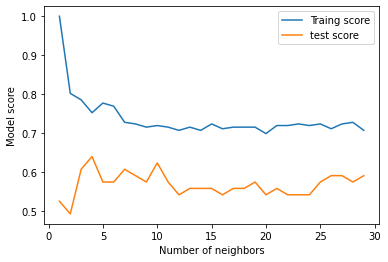

In [66]:
plt.plot(neighbors,train_scores,label="Traing score")
plt.plot(neighbors,test_scores,label="test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximun knn score on the test:{max(test_scores)*100:.2f}")

# HYPREPARAMETER TUNING WITH RANDOMIZEDSEARCHCV

#we 'r going to tune
logisticRegression()
RandomForestClassifier()

using ..randomized reaserchcv

In [77]:
#create a hyperparameter grid for LogisticRegressiom
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
#create a hyperparameter grid fro RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

Now we've got Hyperparameter girds setup for each of our models, lts tune them using RandomizedSearchCV


In [78]:
# tune logistic Regression
np.random.seed(43)
#set up random hyperpRmeter search for Lregressioncv
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                              cv=5,
                             n_iter=20,
                             verbose=True)
#fit hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [58]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [59]:
rs_log_reg.score(x_test,y_test)

0.8360655737704918

Now we've tuned LogisticRegression(),lets do it to randomforestclassifier

In [79]:
# set up random seed
np.random.seed(43)
# setup random Hyperparameters search for randomforestclassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                         n_iter=20,
                        verbose=True)

In [82]:
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [84]:
rs_rf.score(x_test,y_test)

0.8852459016393442

# using GRIDSEARCHCV
since our logi..regre..model provides best scores.so far well try and improve them again using GridSearchCV


In [100]:
# different hyperparameter for logisticRegression model
log_reg_grid={"C":np.logspace(-4,4,40),
             "solver":["liblinear"]}
#setup grid hyperparameters search for logisticRegression
gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
#fit the hyperparameterssearch model
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [101]:
gs_log_reg.best_params_

{'C': 0.49238826317067363, 'solver': 'liblinear'}

In [102]:
gs_log_reg.score(x_test,y_test)

0.8360655737704918

#Evaluating our tuned machine learning classifier,beyond accuracy
ROC CURVE AND AUC CURVE
CONFUSIO MATRIX
CLASSIFICATION REPORT
PRESICION 
RECALL
F2 SCORE
............AND IT WOULD BE GREAT IF CROSS VALIDATION WAS USED WHERE POSSIIBLE


TO MAKE COMPARISINE AND EVALUATE OUR TRAINED MODEL,FIRST WE MAKE PREDICTION HERE...

In [104]:
y_preds=gs_log_reg.predict(x_test)
y_preds

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [105]:
y_test

96     1
296    0
246    0
263    0
292    0
      ..
48     1
168    0
79     1
269    0
273    0
Name: target, Length: 61, dtype: int64

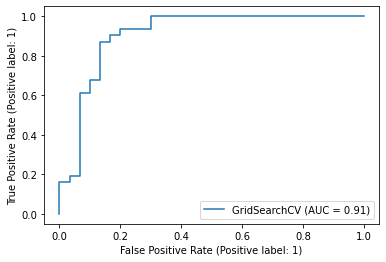

In [106]:
#plot the ROC curve and calculate and calculate AUC curve..
plot_roc_curve(gs_log_reg,x_test,y_test)

In [109]:
# confusion matrix
confution_matrix=(y_test,y_preds)

In [112]:
pd.crosstab(y_test,y_preds)

col_0,0,1
target,,
0,21,9
1,1,30


# Now we git ROC AND AUC curves 
,Lets get claasification report asa well as cross validation precision, recall,f1 score..

In [120]:
classification_report=(y_test,y_preds)

# calculate evaluation metrics using cross validation we're going to calculate precision,recall,f1_score
of our model using cross validation and to do so well be using cross_val_score()

In [122]:
#check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.49238826317067363, 'solver': 'liblinear'}

In [125]:
#create a new classifier with best paramenters
clf=LogisticRegression(C=0.49238826317067363,solver="liblinear")

In [126]:
#cross_validated accuracy
cv_accuracy=cross_val_score(clf,x,y,scoring="accuracy")


In [128]:
#cross validated Precision 
cv_precision=cross_val_score(clf,x,y,scoring="precision")  

In [129]:
#cross validated recall
cv_recall=cross_val_score(clf,x,y,scoring="recall")

In [131]:
#cross validated f1score
cv_f1=cross_val_score(clf,x,y,scoring="f1")

# visualize cross validation metrics:

In [132]:
cv_metric=pd.DataFrame({"Accuracy":cv_accuracy,
                       "Precision":cv_precision,
                       "recall":cv_recall,
                       "f1":cv_f1})

In [135]:
final=np.mean(cv_metric)
final

Accuracy     0.831530
Precision    0.813913
recall       0.903030
f1           0.854802
dtype: float64

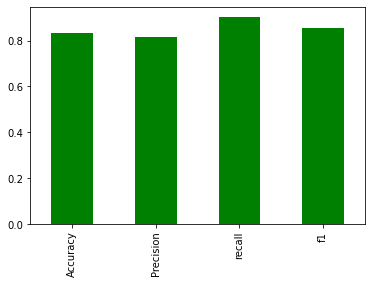

In [145]:
final.plot.bar("Cross validated classification metrics:",color=["Green"]);

# Feature importance

In [148]:
"""feature importance is another as asking
"which feature contributed most to the outcomes of the modeland how did they contribute?"


Finding feature importance is different for each machine learning model
..One wa to find features importance is to search forfeature importance...
Lets find some features importance for our...
"""

#fit an instance of LogisticRegression...
gs_log_reg.best_params_

{'C': 0.49238826317067363, 'solver': 'liblinear'}

In [149]:
# fit
clf=LogisticRegression(C=0.49238826317067363,solver="liblinear")

In [150]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.49238826317067363, solver='liblinear')

In [152]:
#check coef
clf.coef_

array([[ 0.01796696, -1.22297632,  0.77671239, -0.01695601, -0.00488091,
        -0.14691464,  0.51957331,  0.03211899, -0.5883959 , -0.52840608,
         0.27660569, -0.58261925, -0.7472533 ]])

In [153]:
#match coef's of features to columns
feature_dict=dict(zip(data_df.columns,list(clf.coef_[0])))

In [155]:
feature_dict

{'age': 0.017966956235542376,
 'sex': -1.2229763185271325,
 'cp': 0.7767123908110437,
 'trestbps': -0.016956012225925274,
 'chol': -0.004880913916443648,
 'fbs': -0.1469146357334856,
 'restecg': 0.5195733096117375,
 'thalach': 0.032118994895881485,
 'exang': -0.58839590019051,
 'oldpeak': -0.5284060804225656,
 'slope': 0.2766056859016038,
 'ca': -0.5826192496242044,
 'thal': -0.7472533037285293}

#here how much cloumns are contributing to predict target column...
# SAME LIKE CORRELATION MATRIX

In [158]:
feature_df=pd.DataFrame(feature_dict,index=[0])

<AxesSubplot:>

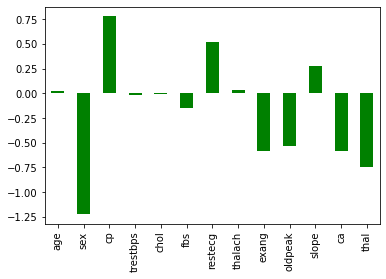

In [167]:
feature_df.T.plot.bar(legend=False,color="green");

In [168]:
pd.crosstab(data_df["sex"],data_df["target"])

target,0,1
sex,,
0,24,72
1,114,93


# 6.EXPERIMENTATION

IF YOU HAVEN'THOT YOUR EVALUATION METRIC YET...ASK YOUR CLIENT...
FOR..>COLLECT MORE DATA?
>TRY BETTER MODEL> LIKE CATBOOST OR XGBOOST
>IMPORVE YOUR THE CURRENT MODELS?(BEYOND WHAT WE'VE DONE SO FAR)?

                                  
>>>>IF your model is good enough (you have hit your evaluation metric how would you export it and share..?)